# 0. Importando as bibliotecas

In [3]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criando uma carteira fictícia

In [6]:
compras_1 = {'BBAS3.SA':1000}
ticker_1 = list(compras_1.keys())

compras_2 = {'BBAS3.SA':1000, 'EGIE3.SA':1000, 'PETR4.SA':1500, 'GGBR4.SA':1000}
ticker_2 = list(compras_2.keys())

compras = compras_2
tickers = list(compras.keys())

In [7]:
# Período
inicio = '2020-01-01'
fim = '2025-02-05'

In [8]:
# Cotação 
if len(tickers) == 1:
    carteira = yf.download(tickers, start=inicio, end=fim, progress=False)[['Adj Close']]
    carteira = carteira.rename(columns={'Adj Close':tickers[0]})
else:
    carteira = yf.download(tickers, start=inicio, end=fim, progress=False)['Adj Close']

In [9]:
# Cotação no início e no fim do período
pd.concat([carteira.head(3), carteira.tail(3)])

Ticker,BBAS3.SA,EGIE3.SA,GGBR4.SA,PETR4.SA
Date,,,,
2020-01-02,18.926306,38.161251,11.424862,9.825955
2020-01-03,18.894642,38.381416,11.237748,9.745941
2020-01-06,18.644871,38.058517,11.210231,9.861164
2025-01-31,27.680000,36.799999,17.219999,37.689999
2025-02-03,27.610001,36.310001,17.480000,37.500000
2025-02-04,27.770000,36.099998,17.090000,37.130001


* Preços de cada ativo na carteira no início do investimento

In [10]:
inicio_preco = carteira.iloc[0]
inicio_preco

Ticker
BBAS3.SA    18.926306
EGIE3.SA    38.161251
GGBR4.SA    11.424862
PETR4.SA     9.825955
Name: 2020-01-02 00:00:00, dtype: float64

* Quantidade de ações compradas

In [11]:
compras_serie = pd.Series(data=compras)

In [12]:
qtde_acoes = round(compras_serie/inicio_preco,  0)
qtde_acoes 

BBAS3.SA     53.0
EGIE3.SA     26.0
GGBR4.SA     88.0
PETR4.SA    153.0
dtype: float64

* Patrimônio Líquido

In [13]:
PL = carteira*qtde_acoes
PL['Carteira'] = PL.sum(axis=1)
PL.head()

Ticker,BBAS3.SA,EGIE3.SA,GGBR4.SA,PETR4.SA,Carteira
Date,,,,,
2020-01-02,1003.094206,992.192528,1005.387848,1503.371175,4504.045756
2020-01-03,1001.416019,997.916824,988.921837,1491.128998,4479.383678
2020-01-06,988.178150,989.521454,986.500313,1508.758106,4472.958023
2020-01-07,980.720577,991.620346,1001.997681,1502.881785,4477.220389
2020-01-08,971.770519,981.698364,1005.871918,1493.577550,4452.918351


* Obtendo dados benchmark

In [14]:
benckmark = yf.download(['^BVSP'], start=inicio, end=fim, progress=False)[['Adj Close']]
benckmark = benckmark.rename(columns={'Adj Close':'Ibovespa'})
benckmark

,Ibovespa
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
...,...
2025-01-29,123432.0
2025-01-30,126913.0
2025-01-31,126135.0


* Juntando as bases de dados

In [15]:
consolidado = pd.merge(PL, benckmark, how='inner', left_index=True, right_index=True)
consolidado.head(3)

,BBAS3.SA,EGIE3.SA,GGBR4.SA,PETR4.SA,Carteira,Ibovespa
Date,,,,,,
2020-01-02,1003.094206,992.192528,1005.387848,1503.371175,4504.045756,118573.0
2020-01-03,1001.416019,997.916824,988.921837,1491.128998,4479.383678,117707.0
2020-01-06,988.178150,989.521454,986.500313,1508.758106,4472.958023,116878.0


* Será necessário normalizar os dados, pois, temos valores em diferentes escalas, o que prejudicaria a visualização. Assim, ao normalizar os dados, podemos ter a real noção do desempenho da carteira montada contra o benchmark.

In [16]:
# Base = início do período
consolidado = consolidado/consolidado.iloc[0]
consolidado.head()

,BBAS3.SA,EGIE3.SA,GGBR4.SA,PETR4.SA,Carteira,Ibovespa
Date,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.998327,1.005769,0.983622,0.991857,0.994524,0.992696
2020-01-06,0.985130,0.997308,0.981214,1.003583,0.993098,0.985705
2020-01-07,0.977695,0.999423,0.996628,0.999674,0.994044,0.983883
2020-01-08,0.968773,0.989423,1.000481,0.993486,0.988649,0.980383


# 2. Desempenho

 ### Comparação com Benchmark

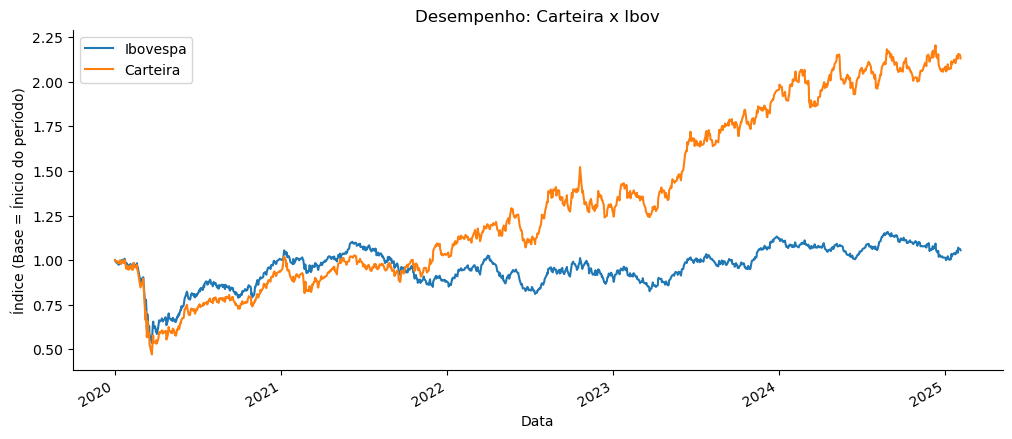

In [17]:
consolidado[['Ibovespa', 'Carteira']].plot(figsize=(12,5))
plt.title('Desempenho: Carteira x Ibovespa')
plt.ylabel('Índice (Base = Ínicio do período)')
plt.xlabel('Data')
sns.despine()

**Comentários:**
1. Veja que, para uma carteira criada de forma aleatoria (não realizei um teste antes), superamos o Ibovespa; 
2. No entanto, é válido destacar que o ibovespa é um índice bastante concentrado, uma das empresas que tem maior influência, tem desvalorizado nos últimos anos, o que faz com que o ibovespa não perfome tão bem;

 ### Performance de cada ativo na carteira

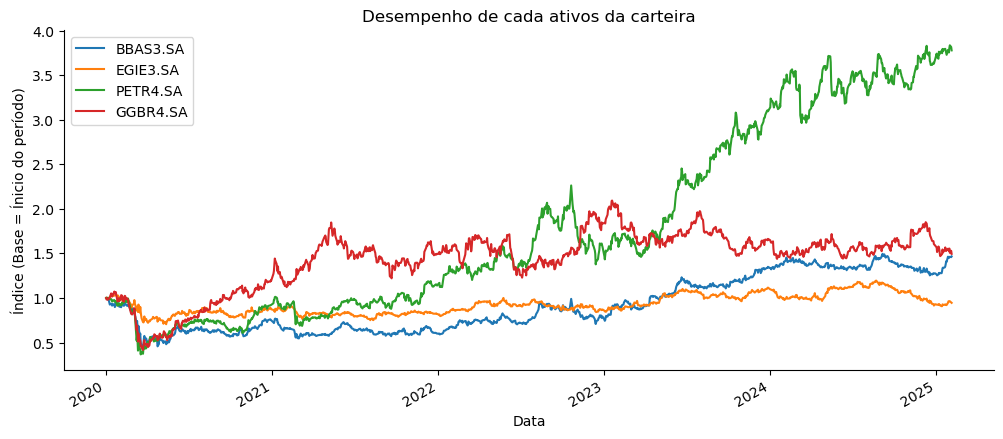

In [18]:
consolidado[tickers].plot(figsize=(12,5))
plt.title('Desempenho de cada ativos da carteira')
plt.ylabel('Índice (Base = Ínicio do período)')
plt.xlabel('Data')
sns.despine()

In [19]:
# Desempenho de cada ativo
desepenho_final = consolidado[tickers].iloc[-1]

In [20]:
# Índice no final do período
desepenho_final.sort_values(ascending=False)

PETR4.SA    3.778768
GGBR4.SA    1.495861
BBAS3.SA    1.467270
EGIE3.SA    0.945986
Name: 2025-02-04 00:00:00, dtype: float64

**Comentários:** 
1. A petrobras(PETR4) foi o ativo com melhor desempenho no períodos;
2. Observe que, apesar de existir um ativo que desvalorizou nesse período (menor que 1), o desempenho da nossa carteira foi positivo. Isso significa que, se tivessemos alocado capital apenas nessa ativos, não teriamos saido tão bem. Isso faz parte do jogo, é nesse ponto que diversificação faz sentido;

 ### Variação do patrimônio líquido

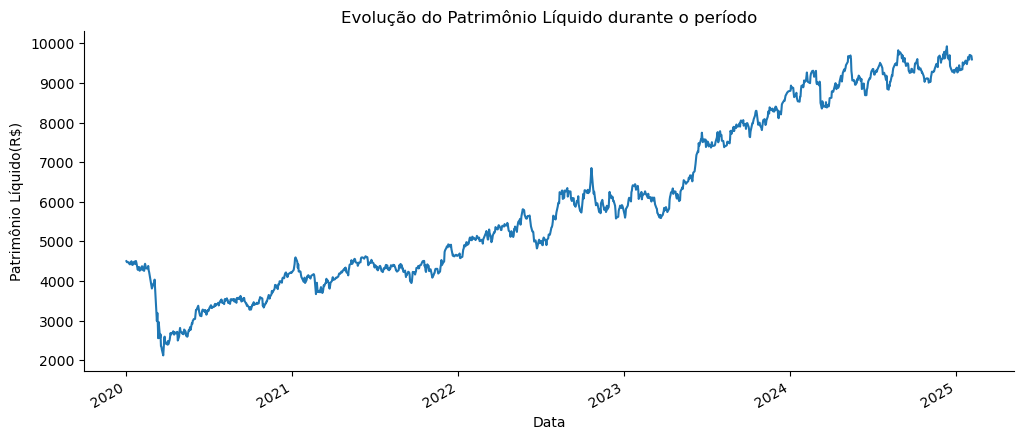

In [21]:
PL['Carteira'].plot(figsize=(12, 5))
plt.title('Evolução do Patrimônio Líquido durante o período')
plt.ylabel('Patrimônio Líquido(R$)')
plt.xlabel('Data')
sns.despine()

# 3. Generalização

In [57]:
def comparar_benchmark(compras:dict, data_inicio, data_fim, benchmark:str ='^BVSP', plot_desempenho_carteira:bool =True, plot_desempenho_ativos:bool =False, plot_pl:bool =False, return_desempenho=False):
    tickers = list(compras.keys())
    compras_serie = pd.Series(data=compras)
    
    # Baixando histórico
    if len(tickers) == 1:
        carteira = yf.download(tickers, start=data_inicio, end=data_fim, progress=False)[['Adj Close']]
        carteira = carteira.rename(columns={'Adj Close':tickers[0]})
    elif len(tickers) > 0:
        carteira = yf.download(tickers, start=data_inicio, end=data_fim, progress=False)['Adj Close']    
    else:
        print('Você não informou nenhuma compra!')
    
    cotacao_inicio = carteira.iloc[0]
    cotacao_fim = carteira.iloc[-1]    
    qtde_ativos = round(compras_serie/cotacao_inicio, 0)            
    
    PL_carteira = carteira*qtde_ativos
    PL_carteira['Carteira'] = PL_carteira.sum(axis=1)
        
    name_benchmarks = {'^BVSP': 'Ibovespa', '^GSPC':'S&P 500', '^DJI':'Dow Jones','BTC-USD':'Bitcoin'}    
    dados_benckmark = yf.download([benchmark], start=data_inicio, end=data_fim, progress=False)[['Adj Close']]
    dados_benckmark = dados_benckmark.rename(columns={'Adj Close':name_benchmarks[benchmark]})
    
    consolidado = pd.merge(PL_carteira, dados_benckmark, how='inner', left_index=True, right_index=True)
    consolidado_normalizado = consolidado/consolidado.iloc[0]
        
    # Gráficos
    if plot_desempenho_carteira:
        consolidado_normalizado[[name_benchmarks[benchmark], 'Carteira']].plot(figsize=(12,5))
        plt.title(f'Desempenho: Carteira x {name_benchmarks[benchmark]}')
        plt.ylabel('Índice (Base = Ínicio do período)')
        plt.xlabel('Data')
        sns.despine()
        plt.show()
            
    if plot_desempenho_ativos:
        consolidado_normalizado[tickers].plot(figsize=(12,5))
        plt.title('Desempenho de cada ativos da carteira')
        plt.ylabel('Índice (Base = Ínicio do período)')
        plt.xlabel('Data')
        sns.despine()
        plt.show()
    
    if plot_pl:
        PL_carteira['Carteira'].plot(figsize=(12, 5))
        plt.title('Evolução do Patrimônio Líquido durante o período')
        plt.ylabel('Patrimônio Líquido(R$)')
        plt.xlabel('Data')
        sns.despine()
        plt.show()
    
    # Desempenho 
    if return_desempenho:
        # Performance dos ativos
        pesos_ativos = PL_carteira[tickers].iloc[0]/PL_carteira[tickers].iloc[0].sum()
        retornos_ativos = (PL_carteira.iloc[-1] - PL_carteira.iloc[0])/PL_carteira.iloc[0]
        desempenho_consolidado = consolidado_normalizado.iloc[-1]
        
        performance_ativos = pd.concat(
            [cotacao_inicio, cotacao_fim, qtde_ativos, pesos_ativos, desempenho_consolidado, retornos_ativos*100], axis=1, join='inner',
            keys=['Preço Início', 'Preço Final', 'Quantidade','Peso', 'Índice', 'Retorno(%)'])
        
        # Performance carteira
        retornos_carteira_bench = (consolidado[['Carteira', name_benchmarks[benchmark]]].iloc[-1] - consolidado[['Carteira', name_benchmarks[benchmark]]].iloc[0])/consolidado[['Carteira', name_benchmarks[benchmark]]].iloc[0]
        desempenho_consolidado_carteira_bench = consolidado_normalizado[['Carteira', name_benchmarks[benchmark]]].iloc[-1]        
        
        performance_carteira_bench = pd.concat(
            [desempenho_consolidado_carteira_bench, retornos_carteira_bench*100], axis=1, join='inner',
            keys=['Índice', 'Retorno(%)'])
                
        return performance_ativos, performance_carteira_bench

 ### Aplicação 01:

In [55]:
compras_ex1 = {'BBAS3.SA':1000, 'EGIE3.SA':1000, 'PETR4.SA':1500, 'GGBR4.SA':1000}
inicio = '2020-01-01'
fim = '2025-02-05'

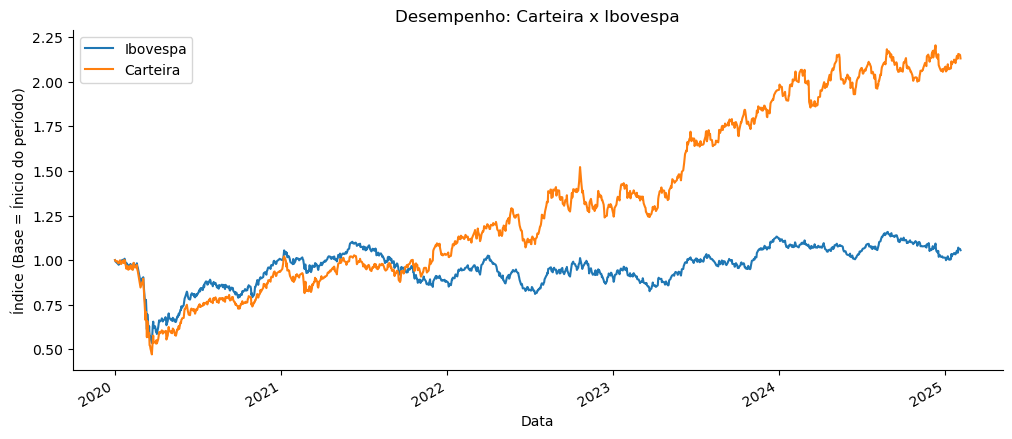

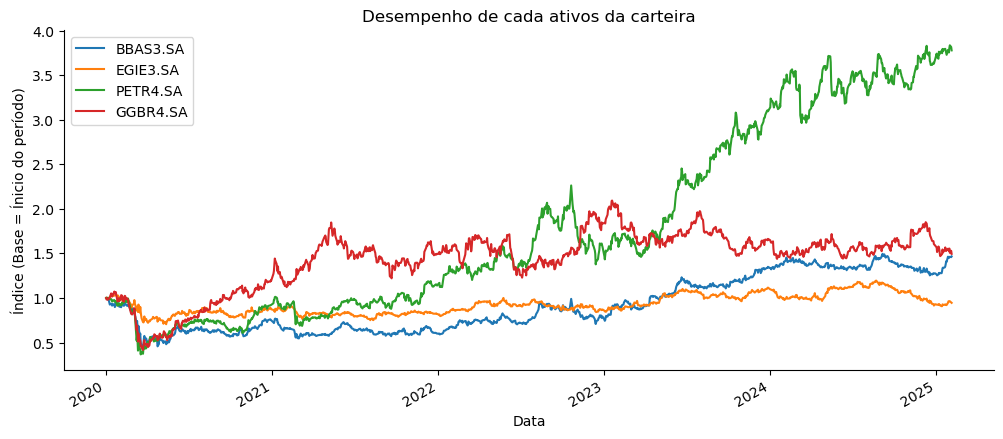

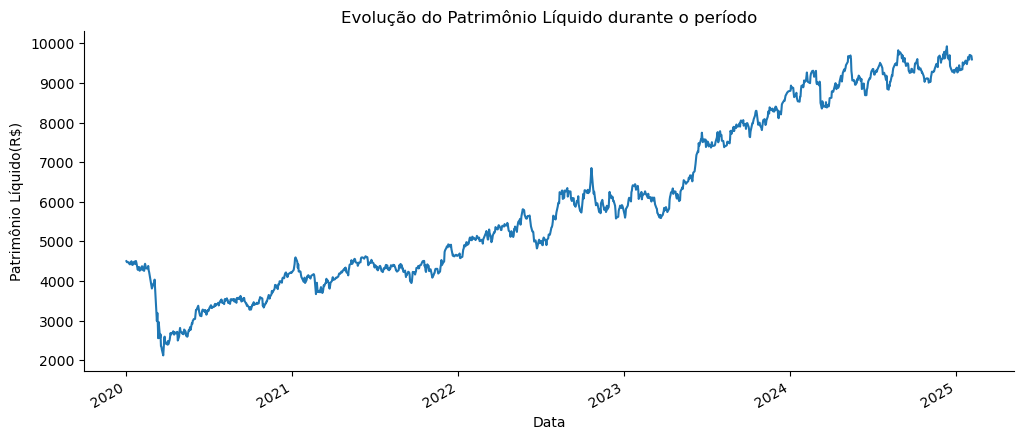

In [56]:
comparar_benchmark(compras_ex1, 
                   data_inicio=inicio, data_fim=fim, 
                   plot_desempenho_carteira=True, 
                   plot_desempenho_ativos=True, 
                   plot_pl=True)

* Retornando a performance em forma de tabela

In [34]:
perf_ativos, perf_cateira_bench = comparar_benchmark(compras_ex1, 
                                                     data_inicio=inicio, data_fim=fim, 
                                                     plot_desempenho_carteira=False, 
                                                     plot_desempenho_ativos=False, 
                                                     plot_pl=False,
                                                     return_desempenho=True)

In [41]:
perf_ativos

,Preço Início,Preço Final,Quantidade,Peso,Índice,Retorno(%)
BBAS3.SA,18.926306,27.770000,53.0,0.222710,1.467270,46.726999
EGIE3.SA,38.161251,36.099998,26.0,0.220289,0.945986,-5.401428
GGBR4.SA,11.424862,17.090000,88.0,0.223219,1.495861,49.586054
PETR4.SA,9.825955,37.130001,153.0,0.333782,3.778768,277.876752


In [36]:
perf_cateira_bench

,Índice,Retorno(%)
Carteira,2.130356,113.035584
Ibovespa,1.055443,5.544264


**Comentários:** 
1. Veja que o retorno pode ser calculado pelo: $Retorno(\%) = (índice - 1)*100$;
2. Os pesos de cada ativo são calculados em relação ao valor aplicado no início em cada ativo;

 ### Aplicação 02

In [58]:
compras_ex2 = {'BBAS3.SA':1000, 'EGIE3.SA':1000, 'PETR4.SA':1500, 'GGBR4.SA':1000}
inicio = '2020-01-01'
fim = '2025-02-05'
bench = '^GSPC'

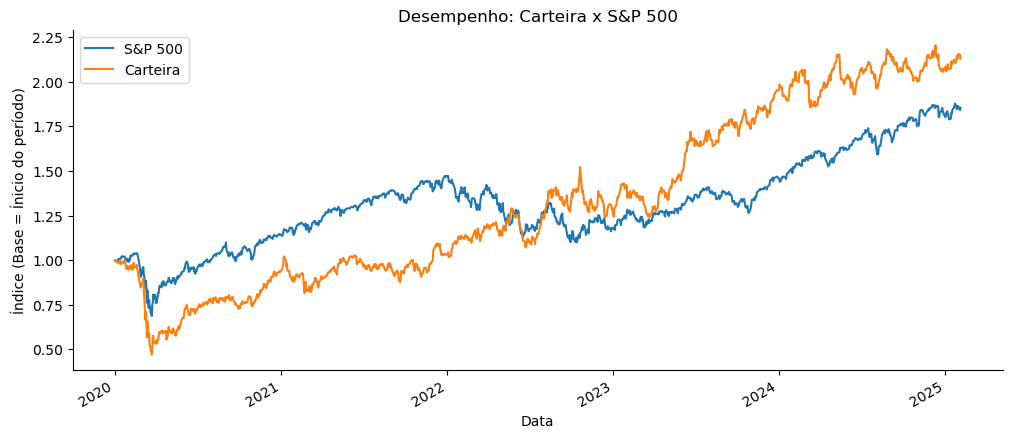

In [59]:
perf_ativos, perf_cateira_bench = comparar_benchmark(compras_ex1, 
                                                     data_inicio=inicio, data_fim=fim, 
                                                     benchmark=bench,   # Agora estamos passando um novo benchmark                                                     
                                                     plot_desempenho_carteira=True, 
                                                     plot_desempenho_ativos=False, 
                                                     plot_pl=False,
                                                     return_desempenho=True)

In [53]:
# Conseguimos bater o S&P500
perf_cateira_bench  

,Índice,Retorno(%)
Carteira,2.130356,113.035584
S&P 500,1.853333,85.333263
